# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + city # + "&appid=" + weather_api_key

requests.get(city_url).json()

{'coord': {'lon': -14.0131, 'lat': 28.4204},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 61.59,
  'feels_like': 60.84,
  'temp_min': 61.59,
  'temp_max': 61.59,
  'pressure': 1016,
  'humidity': 72},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 360},
 'clouds': {'all': 0},
 'dt': 1682299346,
 'sys': {'type': 1,
  'id': 2371,
  'country': 'ES',
  'sunrise': 1682317319,
  'sunset': 1682364371},
 'timezone': 3600,
 'id': 2515271,
 'name': 'Las Palmas',
 'cod': 200}

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | tagta
Processing Record 4 of Set 1 | am djarass
City not found. Skipping...
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | el tocuyo
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | santiago de cao
Processing Record 12 of Set 1 | saint-die-des-vosges
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | sao vicente
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | tomatlan
Processing Record 17 of Set 1 | arkhangel'sk
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | morondava
Processing R

Processing Record 39 of Set 4 | sinabang
Processing Record 40 of Set 4 | shimoda
Processing Record 41 of Set 4 | lazaro cardenas
Processing Record 42 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 43 of Set 4 | jiangkou
Processing Record 44 of Set 4 | samut prakan
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | boryeong
Processing Record 47 of Set 4 | puerto real
Processing Record 48 of Set 4 | zhengjiatun
Processing Record 49 of Set 4 | freetown
Processing Record 0 of Set 5 | ngereklmadel
Processing Record 1 of Set 5 | idanre
Processing Record 2 of Set 5 | ulladulla
Processing Record 3 of Set 5 | torghay
Processing Record 4 of Set 5 | coahuayana de hidalgo
Processing Record 5 of Set 5 | kiunga
Processing Record 6 of Set 5 | beri khas
Processing Record 7 of Set 5 | huarmey
Processing Record 8 of Set 5 | mstsislaw
Processing Record 9 of Set 5 | bamboo flat
Processing Record 10 of Set 5 | maryville
Processing Record 11 of Set 5 | mogadishu
Pro

Processing Record 32 of Set 8 | gizo
Processing Record 33 of Set 8 | las amilpas
Processing Record 34 of Set 8 | laojunmiao
Processing Record 35 of Set 8 | malango
Processing Record 36 of Set 8 | fukuecho
Processing Record 37 of Set 8 | farasan
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | enewetak
Processing Record 40 of Set 8 | khalkhal
Processing Record 41 of Set 8 | stephenville
Processing Record 42 of Set 8 | yebaishou
Processing Record 43 of Set 8 | bam
Processing Record 44 of Set 8 | uren'
Processing Record 45 of Set 8 | hotan
Processing Record 46 of Set 8 | new plymouth
Processing Record 47 of Set 8 | dzhalagash
Processing Record 48 of Set 8 | aden
Processing Record 49 of Set 8 | bakri
Processing Record 0 of Set 9 | mount pleasant
Processing Record 1 of Set 9 | mariental
Processing Record 2 of Set 9 | port hedland
Processing Record 3 of Set 9 | ongjin
Processing Record 4 of Set 9 | mogocha
Processing Record 5 of Set 9 | lospalos
Processing Record 6 of S

Processing Record 23 of Set 12 | bhamo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,44.60,96,100,2.91,CL,2023-04-24
1,port-aux-francais,-49.3500,70.2167,39.54,62,99,32.10,TF,2023-04-24
2,tagta,41.6504,59.9164,60.75,39,0,9.22,TM,2023-04-24
3,ilulissat,69.2167,-51.1000,32.02,100,100,3.44,GL,2023-04-24
4,pisco,-13.7000,-76.2167,71.65,83,0,8.05,PE,2023-04-24


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,44.60,96,100,2.91,CL,2023-04-24
1,port-aux-francais,-49.3500,70.2167,39.54,62,99,32.10,TF,2023-04-24
2,tagta,41.6504,59.9164,60.75,39,0,9.22,TM,2023-04-24
3,ilulissat,69.2167,-51.1000,32.02,100,100,3.44,GL,2023-04-24
4,pisco,-13.7000,-76.2167,71.65,83,0,8.05,PE,2023-04-24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

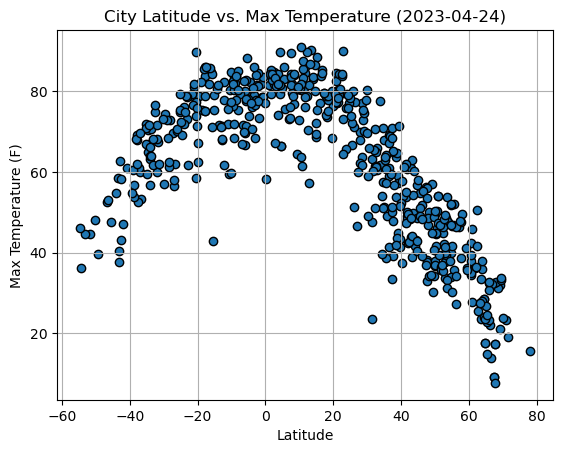

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_temp = plt.scatter( city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="Black") 

title = f"City Latitude vs. Max Temperature ({city_data_df['Date'].min()})"
plt.title(title)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Lat_vs_Temps_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

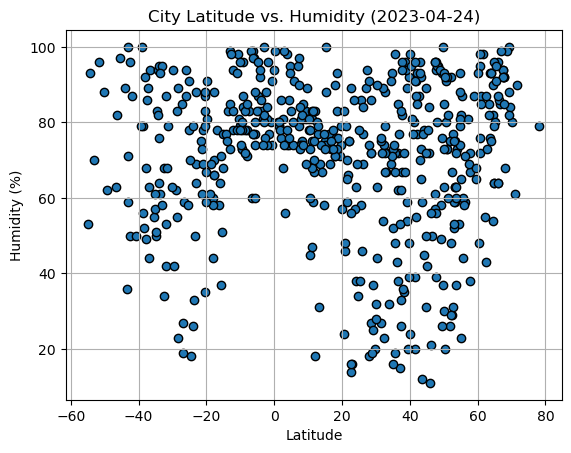

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_humid = plt.scatter( city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="Black") 

title = f"City Latitude vs. Humidity ({city_data_df['Date'].min()})"

plt.title(title)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/lat_vs_humid_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

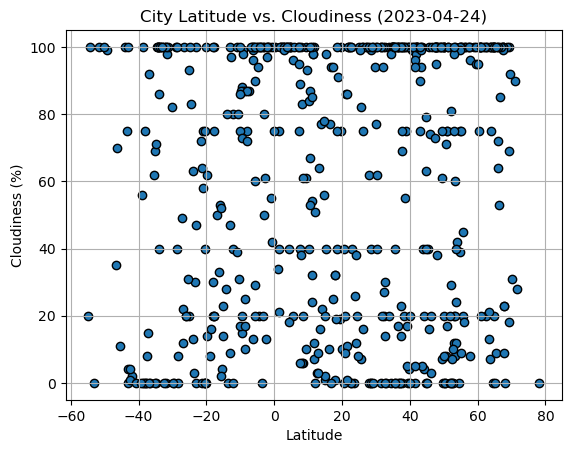

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_clouds = plt.scatter( city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="Black") 
 
title = f"City Latitude vs. Cloudiness ({city_data_df['Date'].min()})"
    
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_vs_clouds_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

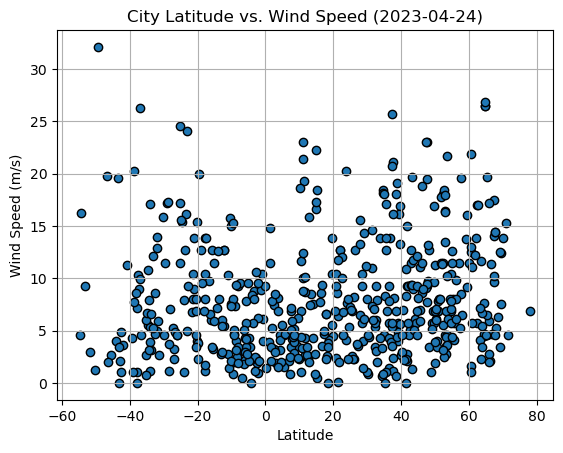

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_clouds = plt.scatter( city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="Black") 
 
title = f"City Latitude vs. Wind Speed ({city_data_df['Date'].min()})"
    
plt.title(title)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_vs_windspeed_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
city_data_df = city_data_df.rename(columns={"Max Temp": "Max Temp (F)", "Humidity": "Humidity (%)",
                                           "Cloudiness": "Cloudiness (%)", "Wind Speed": "Wind Speed (mph)"})
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,44.60,96,100,2.91,CL,2023-04-24
1,port-aux-francais,-49.3500,70.2167,39.54,62,99,32.10,TF,2023-04-24
2,tagta,41.6504,59.9164,60.75,39,0,9.22,TM,2023-04-24
3,ilulissat,69.2167,-51.1000,32.02,100,100,3.44,GL,2023-04-24
4,pisco,-13.7000,-76.2167,71.65,83,0,8.05,PE,2023-04-24


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress

def plot_linear_regression(df, x_col, y_col):
    #Plots a scatter plot with a linear regression line for two columns in a dataframe.

    #Parameters:
     #   df (pandas.DataFrame): The dataframe containing the data.
     #   x_col (str): The name of the column to use as the x-axis.
     #   y_col (str): The name of the column to use as the y-axis.
    

    # Calculate linear regression parameters using linregress
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x_col], df[y_col])

    # Create scatter plot with matplotlib
    plt.scatter(df[x_col], df[y_col])

    # Add regression line to scatter plot
    plt.plot(df[x_col], intercept + slope*df[x_col], 'r')

    # Set title with variable names
    title = f"{x_col.capitalize()} vs. {y_col.capitalize()} Linear Regression"
    plt.title(title)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
City_ID,,,,,,,,,
2,tagta,41.6504,59.9164,60.75,39,0,9.22,TM,2023-04-24
3,ilulissat,69.2167,-51.1000,32.02,100,100,3.44,GL,2023-04-24
5,bethel,41.3712,-73.4140,53.69,80,100,0.00,US,2023-04-24
6,el tocuyo,9.7873,-69.7937,72.93,89,93,2.30,VE,2023-04-24
7,ribeira grande,38.5167,-28.7000,63.77,96,100,18.01,PT,2023-04-24


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,44.60,96,100,2.91,CL,2023-04-24
1,port-aux-francais,-49.3500,70.2167,39.54,62,99,32.10,TF,2023-04-24
4,pisco,-13.7000,-76.2167,71.65,83,0,8.05,PE,2023-04-24
8,santiago de cao,-7.9589,-79.2392,75.33,78,75,9.22,PE,2023-04-24
10,waitangi,-43.9535,-176.5597,54.82,89,100,4.00,NZ,2023-04-24


###  Temperature vs. Latitude Linear Regression Plot

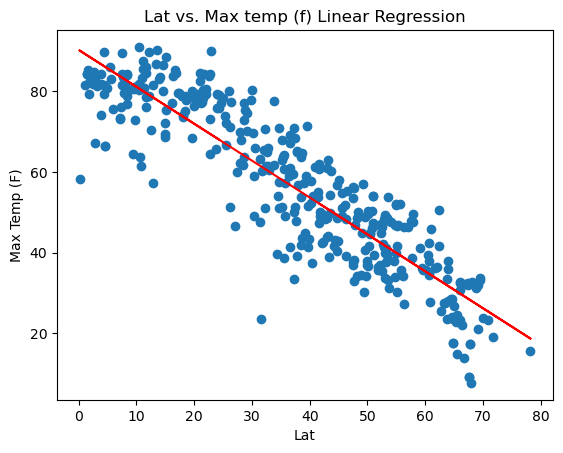

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp (F)')


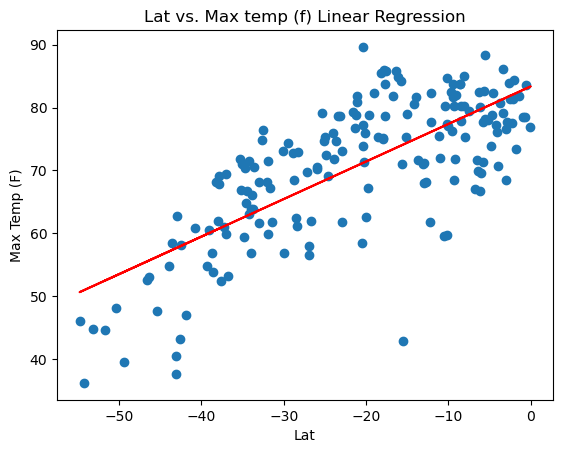

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp (F)')


**Discussion about the linear relationship:** The linear regressions above show the max temperatures increasing closer to latitude 0, and max temperatures decreasing away from latitude 0 for the current datetime.  With the maximum temperatures clustered tightly to the regression line, there appears to be a strong linear relationship between latitude and temperature.  

### Humidity vs. Latitude Linear Regression Plot

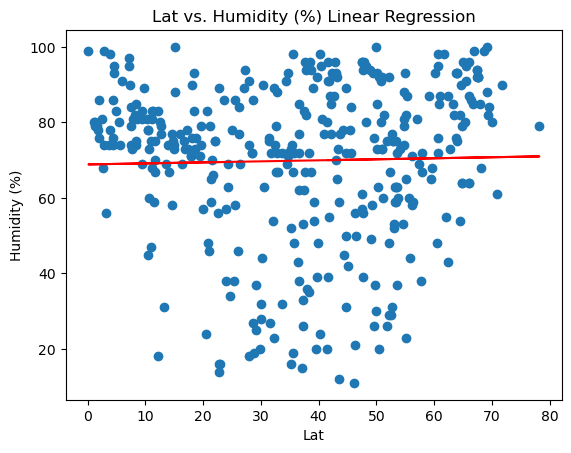

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity (%)')


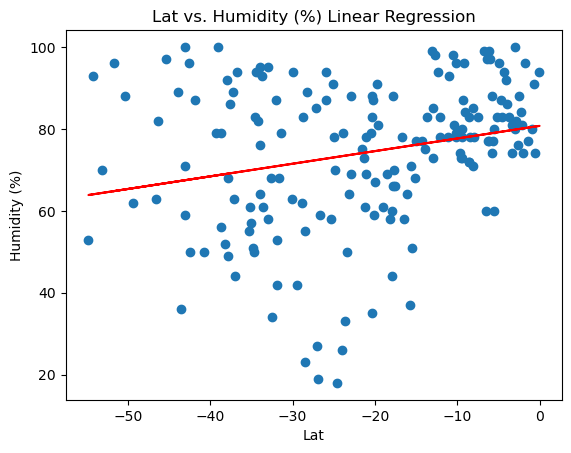

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity (%)')


**Discussion about the linear relationship:** The trend line for humidity was no more than 20% between the max latitudes and latitude 0.  However, the humidity data is widely dispersed from the regression line indicating a weak relationship between humidity and position of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

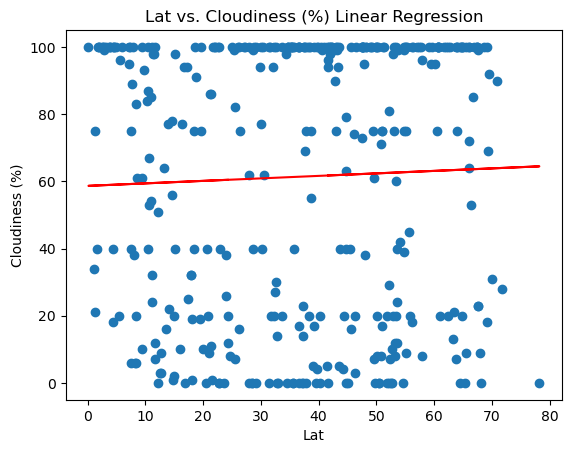

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness (%)')


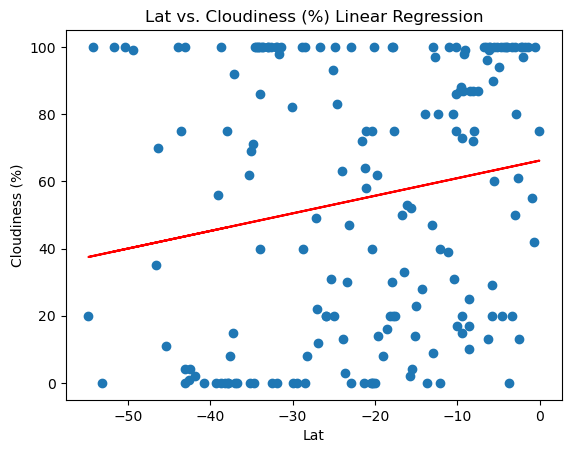

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness (%)')


**Discussion about the linear relationship:** We see in this linear regression model, a similar correlation between cloudiness and latitude, as was demonstrated between humidity and latitude.  The trend line for cloudiness was no more than 20% increase from the max latitudes and latitude 0. However, the cloud data is widely dispersed from the regression line indicating a weak relationship between cloudiness and position of latitude.  

### Wind Speed vs. Latitude Linear Regression Plot

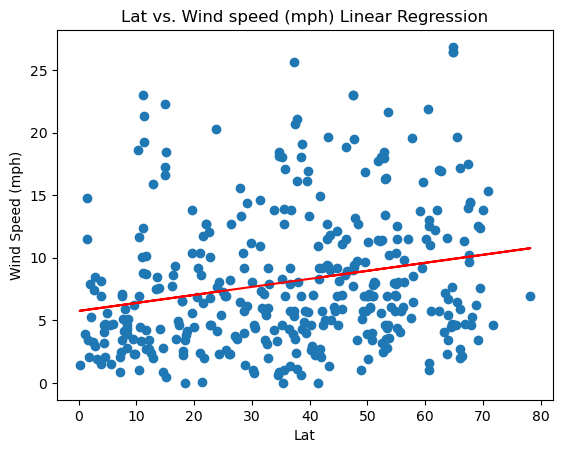

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed (mph)')


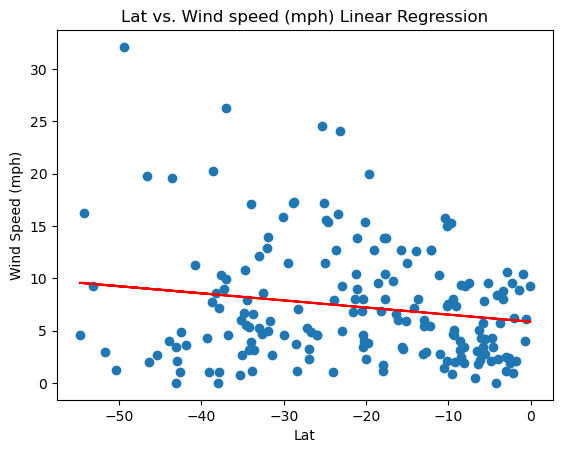

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed (mph)')


**Discussion about the linear relationship:** Trend lines for both the Northern and Southern hemispheres trend upward going away from latitude 0.  